# CIFAR-10 dataset classification

In [1]:
import scipy.io as sio
import numpy as np
import random
import math
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Data partitioning

In [2]:
# Read in the file
train_mat = sio.loadmat("train.mat")
print(train_mat)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 20 17:23:11 2017', '__version__': '1.0', 'trainX': array([[ 59,  43,  50, ...,  84,  72,   6],
       [154, 126, 105, ..., 142, 144,   9],
       [255, 253, 253, ...,  83,  84,   9],
       ..., 
       [ 35,  40,  42, ...,  66,  50,   9],
       [189, 186, 185, ..., 171, 171,   1],
       [229, 236, 234, ..., 162, 161,   1]], dtype=int64), '__globals__': []}


In [3]:
# Understand the data content
train_mat.keys()

dict_keys(['__header__', '__version__', 'trainX', '__globals__'])

In [4]:
# Get the training data
train_data = train_mat['trainX']
train_data

array([[ 59,  43,  50, ...,  84,  72,   6],
       [154, 126, 105, ..., 142, 144,   9],
       [255, 253, 253, ...,  83,  84,   9],
       ..., 
       [ 35,  40,  42, ...,  66,  50,   9],
       [189, 186, 185, ..., 171, 171,   1],
       [229, 236, 234, ..., 162, 161,   1]], dtype=int64)

In [5]:
# Check the amount of data in the training set
train_data.shape

(50000, 3073)

In [6]:
# Set aside 5000 training images as a validation set
validation_index = np.array(random.sample(range(train_data.shape[0]), 5000))
validation_set = train_data[validation_index]

In [7]:
# Verify the validation set size
validation_set.shape

(5000, 3073)

In [8]:
# Construct the training set
training_data = np.delete(train_data, validation_index, 0)
print(training_data.shape)

(45000, 3073)


## SVM

### Separate labels and data from validation_set

In [9]:
validation_labels = validation_set[:, 3072]
validation_data = validation_set[:, 0:3072]
print(validation_labels.shape)
print(validation_data.shape)

(5000,)
(5000, 3072)


### Training on n examples

In [10]:
accuracy_score = []
def training_classifier(n, param = 1.0, l = accuracy_score):
    # Get 100 training data
    training_data1 = training_data[0:n, 0:3072]
    training_labels1 = training_data[0:n, 3072]
    print(training_data1.shape)
    print(training_labels1.shape)
    # Build the SVC classifier
    classifier1 = SVC(C = param, kernel='linear')
    classifier1.fit(training_data1, training_labels1)
    # Make prediction
    score1 = classifier1.score(validation_data, validation_labels)
    print("accuracy score", score1)
    l.append(score1)

In [11]:
training_size = [100, 200, 500, 1000, 2000, 5000]
for n in training_size:
    training_classifier(n, l = accuracy_score)
print(accuracy_score)

(100, 3072)
(100,)
accuracy score 0.2042
(200, 3072)
(200,)
accuracy score 0.2544
(500, 3072)
(500,)
accuracy score 0.2916
(1000, 3072)
(1000,)
accuracy score 0.3018
(2000, 3072)
(2000,)
accuracy score 0.2976
(5000, 3072)
(5000,)
accuracy score 0.2938
[0.20419999999999999, 0.25440000000000002, 0.29160000000000003, 0.30180000000000001, 0.29759999999999998, 0.29380000000000001]


## Plot the accuracy score 

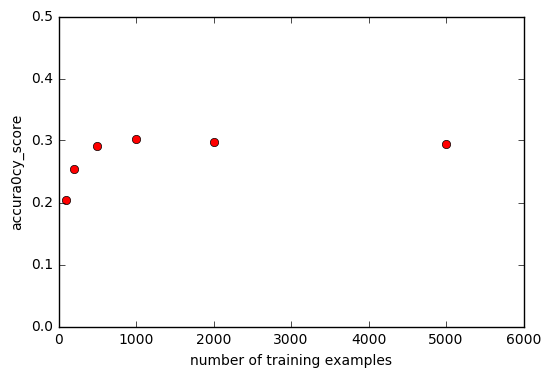

In [15]:
plt.plot(training_size, accuracy_score, "ro")
plt.ylabel("accura0cy_score")
plt.xlabel("number of training examples")
plt.axis([0, 6000, 0, 0.5])
plt.show()